### Assignment 2: Points to map 

 Plot a map of points, based on a set of longitude and latitude coordinates that are stored in a csv file.

The input data is stored in the CSV spreadsheet ***'sweden_points.csv'*** which you can download from the exercise folder. Add it your working directory and import it.  The coordinates stored there are in WGS84 format (decimal degrees, EPSG:4326) and it contains 2000 locations and 3 columns (latitude, longtitde and ID).

First import the csv file as a pandas dataframe.

In [1]:
# Libraries
import pandas as pd
import pathlib
import geopandas as gpd

#location (directory) of the notebook
NOTEBOOK_PATH = pathlib.Path().resolve()  # Notebook and shape csv file in the same folder
print(NOTEBOOK_PATH)

# Read file
df = pd.read_csv("sweden_points.csv", names = ["lat", "lon", "Trip_ID"], usecols = [0, 1, 2], skiprows = 1)

"""
#alternative method
# Pandas to Geo-Pandas
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lon, df.lat),
    crs="EPSG:4326"
)
"""

C:\Users\Muffin\Documents\Courses\COURSE_20250101_Geospatial_Python\L2\Exercise_2


'\n#alternative method\n# Pandas to Geo-Pandas\ngdf = gpd.GeoDataFrame(\n    df,\n    geometry=gpd.points_from_xy(df.lon, df.lat),\n    crs="EPSG:4326"\n)\n'

1) Add a geometry column and fill it with geometries.
Create an empty column called ***geometry*** where you will store shapely Point objects.
Insert Point objects into the column geometry based on the coordinate columns.
You want to create a shapely.geometry.Point for each row, based on the columns longitude and latitude

In [2]:
from shapely.geometry import Point 
# Create an empty column called 'geometry' 
df["Geometry"] = "" 

# Iterate over each row in the DataFrame and insert a Point object into the 'geometry' column 
for i, row in df.iterrows(): 
    geometry = Point(row["lon"], row["lat"]) 
    df.at[i, "Geometry"] = geometry

# Print the first few rows of the DataFrame to verify that the 'geometry' column was added correctly
print(df.head())

         lat        lon  Trip_ID                                      Geometry
0  59.751286  21.149547        1   POINT (21.14954727276289 59.75128564941775)
1  65.258818  21.154727        1   POINT (21.15472668615925 65.25881798502805)
2  61.744069  21.413240        1  POINT (21.413240388392545 61.74406920192757)
3  58.834489  23.026573        1  POINT (23.026572762151275 58.83448938216252)
4  61.308422  17.221379        1   POINT (17.221379411521763 61.3084223226109)


2) Convert the pandas.DataFrame into a geopandas.GeoDataFrame 

In [3]:
# Convert the Pandas DataFrame to a GeoPandas DataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lon, df.lat),
    crs="EPSG:4326"
)

# Print the first few rows of the GeoPandas DataFrame to verify that it was created correctly
print(df.head())
gdf.crs

         lat        lon  Trip_ID                                      Geometry
0  59.751286  21.149547        1   POINT (21.14954727276289 59.75128564941775)
1  65.258818  21.154727        1   POINT (21.15472668615925 65.25881798502805)
2  61.744069  21.413240        1  POINT (21.413240388392545 61.74406920192757)
3  58.834489  23.026573        1  POINT (23.026572762151275 58.83448938216252)
4  61.308422  17.221379        1   POINT (17.221379411521763 61.3084223226109)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

 3) Save the data in Shapefile format as sweden_points.shp inside the data directory

In [4]:
# Save shp file
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
print(NOTEBOOK_PATH)
gdf.to_file(NOTEBOOK_PATH  / "gdf_Lab2_2.shp")

C:\Users\Muffin\Documents\Courses\COURSE_20250101_Geospatial_Python\L2\Exercise_2


4. Simply plot your points with geodataframe.plot() https://geopandas.org/en/stable/docs/user_guide/mapping.html 

<Axes: >

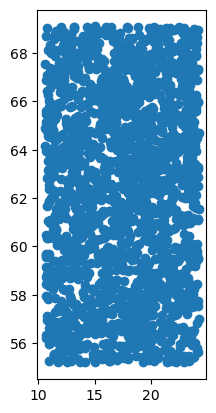

In [5]:
gdf.plot()